In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
dataset = pd.read_csv('Salary_data.csv')

dataset = dataset.drop('serial_no', axis=1)

X = dataset[['YearsExperience']].values
y = dataset[['Salary']].values

In [3]:
dataset.head()

,YearsExperience,Salary
0,1.2,39344
1,1.4,46206
2,1.6,37732
3,2.1,43526
4,2.3,39892


In [4]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [5]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

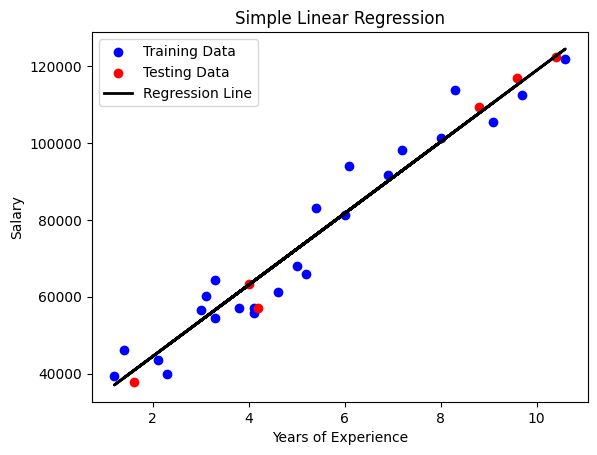

In [7]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

y_pred = linear_regressor.predict(X_test)

plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Testing Data')
plt.plot(X_train, linear_regressor.predict(X_train), color='black', linewidth=2, label='Regression Line')

plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

In [8]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

In [9]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        gradient = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

In [10]:
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]

In [12]:
theta = np.zeros((X_train_bias.shape[1], 1))
alpha = 0.01
# Define the number of iterations for gradient descent
iterations = 1000
theta_optimal, cost_history = gradient_descent(X_train_bias, y_train, theta, alpha, iterations)


In [13]:
y_pred_gd = X_test_bias.dot(theta_optimal)


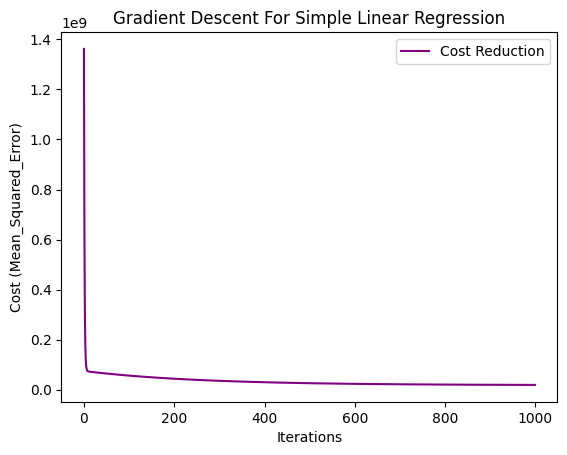

In [14]:
plt.plot(range(iterations), cost_history, color='purple', label="Cost Reduction")
plt.xlabel("Iterations")
plt.ylabel("Cost (Mean_Squared_Error)")
plt.title("Gradient Descent For Simple Linear Regression")
plt.legend()
plt.show()


In [16]:
dataset = pd.read_csv('mtcars.csv')
dataset = dataset.drop('car_names', axis=1)

In [17]:
X = dataset.drop('miles_per_gallon', axis=1).values
y = dataset['miles_per_gallon'].values.reshape(-1, 1)

In [18]:
dataset.head()

,miles_per_gallon,cylinders,displacement,horsepower,rear_axle_ratio,weight,quarter_mile _time,engine_shape,transmission,gear,carburetors
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [19]:
dataset.describe()

,miles_per_gallon,cylinders,displacement,horsepower,rear_axle_ratio,weight,quarter_mile _time,engine_shape,transmission,gear,carburetors
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   miles_per_gallon    32 non-null     float64
 1   cylinders           32 non-null     int64  
 2   displacement        32 non-null     float64
 3   horsepower          32 non-null     int64  
 4   rear_axle_ratio     32 non-null     float64
 5   weight              32 non-null     float64
 6   quarter_mile _time  32 non-null     float64
 7   engine_shape        32 non-null     int64  
 8   transmission        32 non-null     int64  
 9   gear                32 non-null     int64  
 10  carburetors         32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 2.9 KB


In [21]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

In [24]:
theta = np.zeros((X_train.shape[1], 1))
alpha = 0.01

In [25]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

In [26]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        gradient = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

In [27]:
theta_optimal, cost_history = gradient_descent(X_train, y_train, theta, alpha, iterations)

In [28]:
y_pred = X_test.dot(theta_optimal)

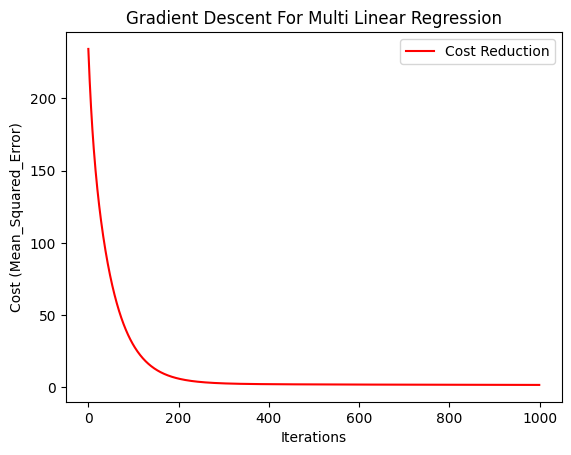

In [29]:
plt.plot(range(iterations), cost_history,  color='red', label="Cost Reduction")
plt.xlabel("Iterations")
plt.ylabel("Cost (Mean_Squared_Error)")
plt.title("Gradient Descent For Multi Linear Regression")
plt.legend()
plt.show()